## EDA

#### Notas de las Variables

**pclass**: Un aproximado del estado socio-económico del pasajero.
1st = Alto
2nd = Medio
3rd = Bajo

**age**: Edad. La edad es fraccional si es menor a 1. Si es estimada, aparece en la forma de xx.5.

**sibsp**: el dataset define relaciones familiares del siguiente modo:
- Hermano (Sibling) = hermano, hermana, hermanastro, hermanastra
- Cónyuge (Spouse) = esposo, esposa (se ignoraban las amantes y los prometidos)
Entonces, **sibsp** contiene el conteo de hermanos y cónyuges de cada pasajero.

**parch**: Otra variable que detalla relaciones familiares del siguiente modo:
- Padre (Parent) = madre, padre
- Hijo (Child) = hija, hijo, hijastra, hijastro
Entonces, **parch** contiene el conteo de padres e de cada pasajero.
Algunos niños viajaron solo con niñera, por lo que parch=0 para ellos.

![data-dictionary.png](../data/data-dictionary.png)

### Librerías

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Cargando Datos

In [4]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Información general:

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
# cantidad de valores nulos en el conjunto de entrenamiento
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# cantidad de valores nulos en el conjunto de prueba
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Gráficas

In [11]:
# esta celda define estilos para las gráficas, tanto colores como tamaños.
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (8, 3)

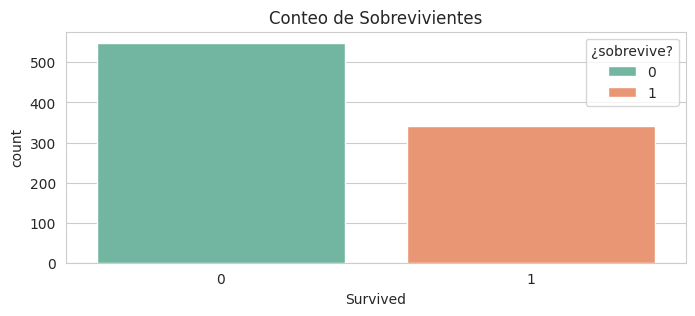

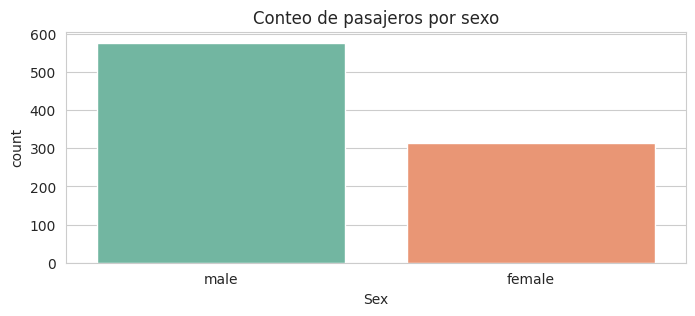

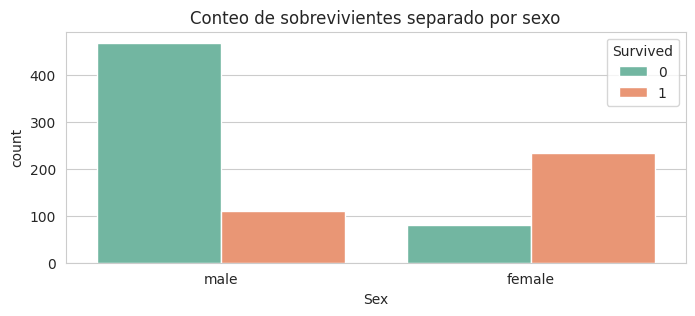

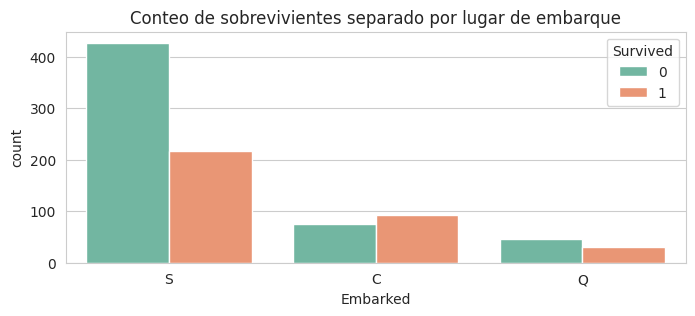

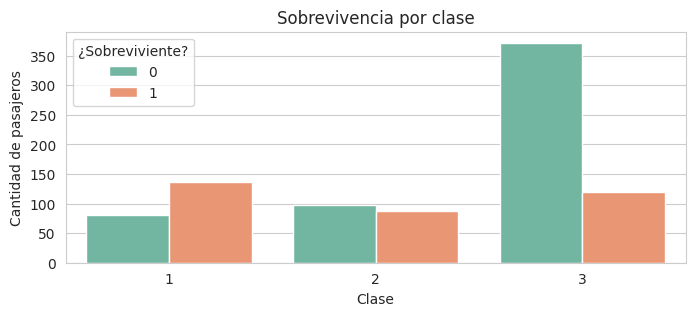

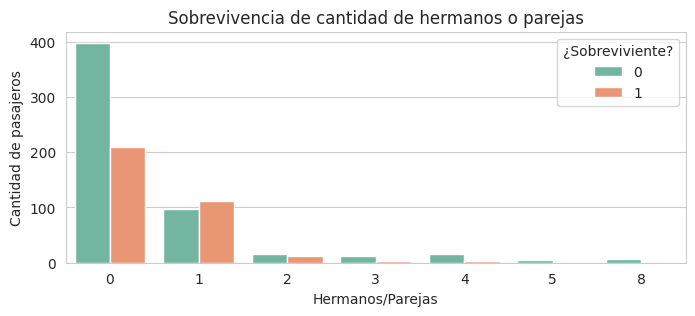

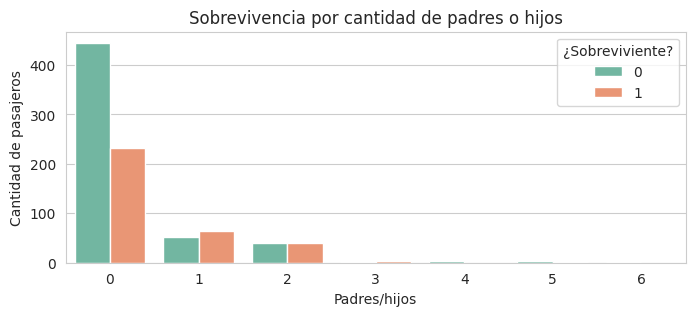

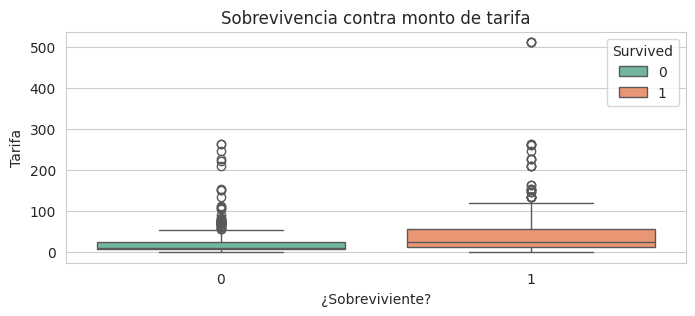

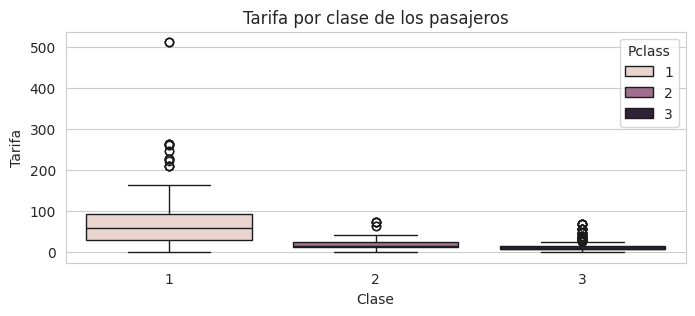

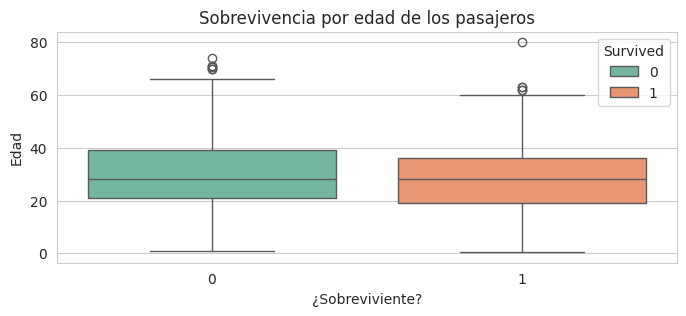

In [17]:
# aquí se grafican los datos tal y como se encuentran en el dataset, es decir, sin procesamiento previo.
plt.figure()
sns.countplot(data=df_train, x="Survived", hue="Survived")
plt.title("Conteo de Sobrevivientes")
plt.legend(title="¿sobrevive?")
plt.show()

plt.figure()
sns.countplot(data=df_train, x="Sex", hue="Sex")
plt.title("Conteo de pasajeros por sexo")
plt.show()

plt.figure()
sns.countplot(data=df_train, x="Sex", hue="Survived")
plt.title("Conteo de sobrevivientes separado por sexo")
plt.show()

plt.figure()
sns.countplot(data=df_train, x="Embarked", hue="Survived")
plt.title("Conteo de sobrevivientes separado por lugar de embarque")
plt.show()

plt.figure()
sns.countplot(data=df_train, x="Pclass", hue="Survived")
plt.title("Sobrevivencia por clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad de pasajeros")
plt.legend(title="¿Sobreviviente?")
plt.show()

plt.figure()
sns.countplot(data=df_train, x="SibSp", hue="Survived")
plt.title("Sobrevivencia de cantidad de hermanos o parejas")
plt.xlabel("Hermanos/Parejas")
plt.ylabel("Cantidad de pasajeros")
plt.legend(title="¿Sobreviviente?")
plt.show()

plt.figure()
sns.countplot(data=df_train, x="Parch", hue="Survived")
plt.title("Sobrevivencia por cantidad de padres o hijos")
plt.xlabel("Padres/hijos")
plt.ylabel("Cantidad de pasajeros")
plt.legend(title="¿Sobreviviente?")
plt.show()

plt.figure()
sns.boxplot(data=df_train, x="Survived", y="Fare", hue="Survived")
plt.title("Sobrevivencia contra monto de tarifa")
plt.xlabel("¿Sobreviviente?")
plt.ylabel("Tarifa")
plt.show()

plt.figure()
sns.boxplot(data=df_train, x="Pclass", y="Fare", hue="Pclass")
plt.title("Tarifa por clase de los pasajeros")
plt.xlabel("Clase")
#plt.ylim((0,100))
plt.ylabel("Tarifa")
plt.show()

plt.figure()
sns.boxplot(data=df_train, x="Survived", y="Age", hue="Survived")
plt.title("Sobrevivencia por edad de los pasajeros")
plt.xlabel("¿Sobreviviente?")
plt.ylabel("Edad")
plt.show()

### Observaciones:
En base a lo anterior, se destaca lo siguiente:

+ La mayoría de los pasajeros murió (Survived = 0).
+ La mayoría de la primera clase sobrevivió.
+ La mayoría de hombres murieron.
+ Hubo más mortandad en personas que viajaron solas.
+ La edad media no varía mucho entre quienes sobrevivieron y quienes no, pero la distribución es más acotada en el primer caso a personas jóvenes.
+ El monto de la tarifa está correlacionado a la clase de pasajero.

**Notar**: la mayoría de quienes embarcaron en Southampton (Embarked = S) eran de tercera clase (Pclass = 3). Esto puede notarse en las siguientes gráficas:

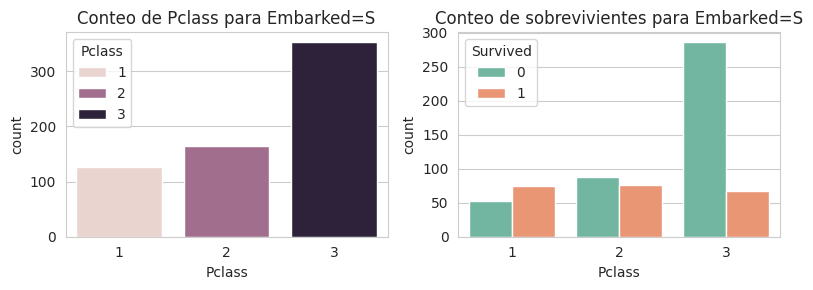

In [13]:
# plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data=df_train[df_train["Embarked"] == "S"], x="Pclass", hue="Pclass")
plt.title("Conteo de Pclass para Embarked=S")

plt.subplot(122)
sns.countplot(data=df_train[df_train["Embarked"] == "S"], x="Pclass", hue="Survived")
plt.title("Conteo de sobrevivientes para Embarked=S")

plt.tight_layout()
plt.show()

### Títulos de los pasajeros

Los nombres y apellidos de los pasajeros fuerona anotados junto a sus títulos, los cuales pueden aportar información extra acerca de la edad y posición social. Estos títulos son, por ejemplo, Mr., Miss., Master, etc.

A continuación se define una función para extraer los títulos desde los nombres del dataset. Se han seleccionado los cuatro títulos más frecuentes como categorías separadas, y el resto de los títulos quedan en la categoría "Otro".

In [14]:
def extract_titles(names) -> list:
    """A partir de los nombres del dataframe extrae los títulos asociados a cada pasajero."""
    titles = ("Mr.", "Mrs.", "Miss.", "Master.")
    
    title_column = []
    for n in names:
        found = False
        for t in titles:
            if t in n:
                title_column.append(t)
                found = True
                break
        if not found:
            title_column.append("Otro") # Otros títulos: "Rev.", "Dr.", "Capt.", "Mlle.", "Col.", "Major.","Mme."
    return title_column

In [15]:
# Extrayendo títulos:
df_train["Title"] = extract_titles(df_train["Name"])

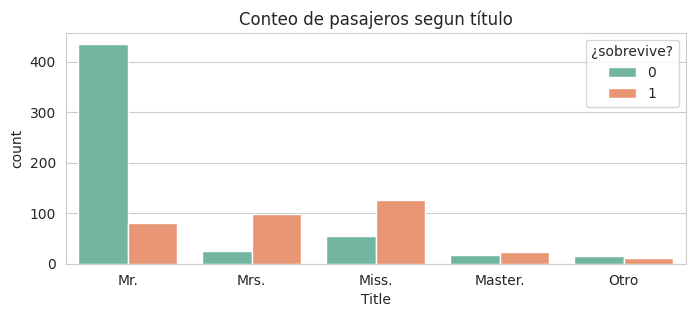

In [16]:
plt.figure()
sns.countplot(data=df_train, x="Title", hue="Survived", palette="Set2")
plt.title("Conteo de pasajeros segun título")
plt.legend(title="¿sobrevive?")
plt.show()

De esta última gráfica se concluye que los títulos con más alta tasa de sobrevivencia son:
+ Mrs.
+ Miss.
+ Master.

Esto aporta información adicional aparte del sexo del pasajero.

### Conclusiones

1. El conjunto de datos está desbalanceado (en concordancia con el escenario real).
2. Existen columnas sin valor (nulos): Age, Fare y Cabin.
3. Se puede extraer información útil de los nombres de los pasajeros (el título).